In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load match related data

In [2]:
df_2018 = pd.read_csv("data/afl_results_2018.csv")
print(df_2018.shape)

df_2019 = pd.read_csv("data/afl_results_2019.csv")
print(df_2019.shape)
df_2020 = pd.read_csv("data/afl_results_2020.csv")
print(df_2020.shape)
df_2021 = pd.read_csv("data/afl_results_2021.csv")
print(df_2021.shape)
df_2022 = pd.read_csv("data/afl_results_2022.csv")
print(df_2022.shape)

df_all = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022], axis=0)
print(df_all.shape)
df_all.columns

(207, 75)
(207, 75)
(162, 75)
(207, 75)
(54, 75)
(837, 75)


Index(['match.name', 'match.date', 'match.status', 'match.matchId',
       'match.venue', 'match.utcStartTime', 'match.homeTeamId',
       'match.awayTeamId', 'match.round', 'match.venueLocalStartTime',
       'match.abbr', 'match.twitterHashTag', 'match.homeTeam.name',
       'match.homeTeam.timeZone', 'match.homeTeam.teamId',
       'match.homeTeam.abbr', 'match.homeTeam.nickname', 'match.awayTeam.name',
       'match.awayTeam.timeZone', 'match.awayTeam.teamId',
       'match.awayTeam.abbr', 'match.awayTeam.nickname', 'venue.address',
       'venue.name', 'venue.state', 'venue.timeZone', 'venue.venueId',
       'venue.abbreviation', 'venue.capacity', 'venue.groundDimension',
       'venue.latitude', 'venue.longitude', 'round.name', 'round.year',
       'round.roundId', 'round.abbreviation', 'round.competitionId',
       'round.roundNumber', 'status', 'matchId', 'scoreWorm', 'scoreMap',
       'lastUpdated', 'homeTeamScore.periodScore',
       'homeTeamScore.rushedBehinds', 'homeTeamS

In [3]:
df_fixture = pd.read_csv("data/fixture_2022.csv")
print(df_fixture.shape)
df_fixture.columns

# get right fixture rounds
df_next_games_teams = df_fixture[(df_fixture['status'] != "CONCLUDED") & (df_fixture['round.roundNumber'] == 7)]
df_next_games_teams = df_next_games_teams[['home.team.name','away.team.name']]
df_next_games_teams = df_next_games_teams.rename(columns={'home.team.name': 'match.homeTeam.name', 'away.team.name': 'match.awayTeam.name'})
df_next_games_teams

(198, 54)


,match.homeTeam.name,match.awayTeam.name
54,West Coast Eagles,Richmond
55,Geelong Cats,Fremantle
56,Adelaide Crows,GWS Giants
57,Melbourne,Hawthorn
58,St Kilda,Port Adelaide
59,Carlton,North Melbourne
60,Collingwood,Gold Coast Suns
61,Western Bulldogs,Essendon
62,Sydney Swans,Brisbane Lions


In [4]:
df_all.shape

(837, 75)

In [5]:
df_all.sort_values('match.date', inplace=True)
df_all.reset_index(inplace=True)
df_all.drop('index', axis=1, inplace=True)

In [6]:
df_all.tail()

,match.name,match.date,match.status,match.matchId,match.venue,match.utcStartTime,match.homeTeamId,match.awayTeamId,match.round,match.venueLocalStartTime,...,homeTeamScoreChart.rightPosters,homeTeamScoreChart.rushedBehinds,homeTeamScoreChart.touchedBehinds,awayTeamScoreChart.goals,awayTeamScoreChart.leftBehinds,awayTeamScoreChart.rightBehinds,awayTeamScoreChart.leftPosters,awayTeamScoreChart.rightPosters,awayTeamScoreChart.rushedBehinds,awayTeamScoreChart.touchedBehinds
832,North Melbourne Vs Geelong Cats,2022-04-24 03:10:00,CONCLUDED,CD_M20220140605,CD_V2,2022-04-24T03:10:00,CD_T100,CD_T70,CD_R202201406,2022-04-24T13:10:00,...,1,0,1,17,3,9,2,1,3,1
833,Gold Coast Suns Vs Brisbane Lions,2022-04-24 06:10:00,CONCLUDED,CD_M20220140606,CD_V81,2022-04-24T06:10:00,CD_T1000,CD_T20,CD_R202201406,2022-04-24T16:10:00,...,0,4,1,21,2,1,0,2,1,0
834,Richmond Vs Melbourne,2022-04-24 09:25:00,CONCLUDED,CD_M20220140607,CD_V40,2022-04-24T09:25:00,CD_T120,CD_T90,CD_R202201406,2022-04-24T19:25:00,...,0,1,0,9,6,10,2,0,3,1
835,Hawthorn Vs Sydney Swans,2022-04-25 02:30:00,CONCLUDED,CD_M20220140608,CD_V200,2022-04-25T02:30:00,CD_T80,CD_T160,CD_R202201406,2022-04-25T12:30:00,...,1,2,0,16,8,3,0,0,2,0
836,Essendon Vs Collingwood,2022-04-25 05:20:00,CONCLUDED,CD_M20220140609,CD_V40,2022-04-25T05:20:00,CD_T50,CD_T40,CD_R202201406,2022-04-25T15:20:00,...,0,3,0,15,1,1,0,0,1,0


In [7]:
from pandas.plotting import scatter_matrix

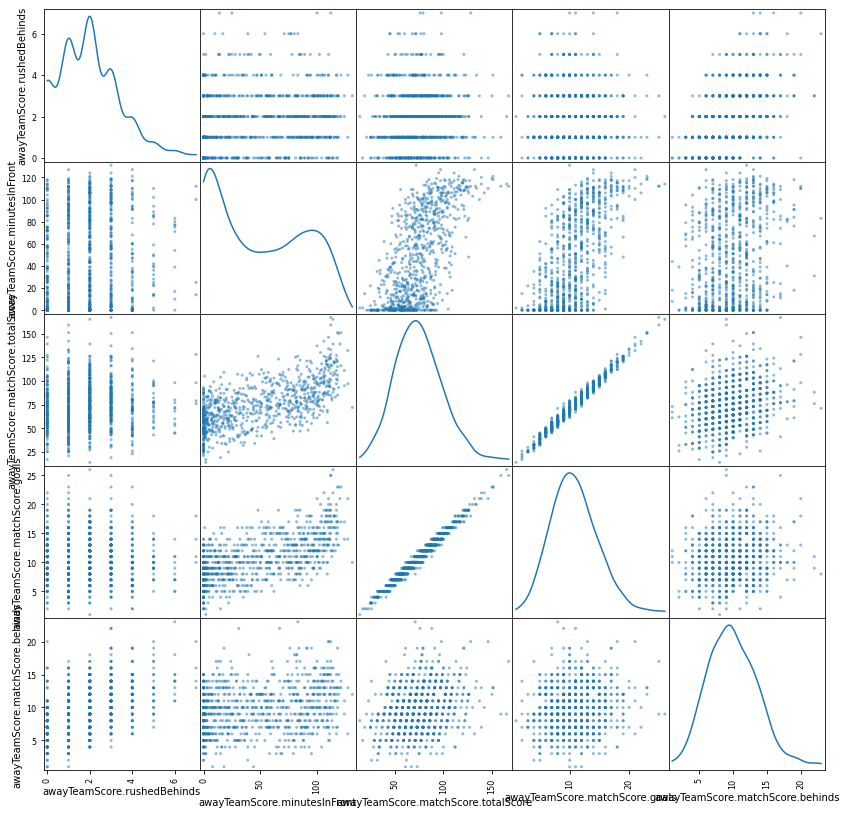

In [8]:
scatter_matrix(df_all[df_all.iloc[:,50:56].columns], diagonal='kde', figsize=(14,14));

In [9]:
# HTGDIFF: Home Team Goal Difference
# ATGDIFF: Away Team Goal Difference

df_all['HTGDIFF'] = df_all['homeTeamScore.matchScore.goals'] - df_all['awayTeamScore.matchScore.goals']
df_all['ATGDIFF'] = df_all['awayTeamScore.matchScore.goals'] - df_all['homeTeamScore.matchScore.goals']

## Calculate AVG goal difference for home and away team rolling 4 Games

In [10]:
def avg_goal_diff(df, avg_h_a_diff, a_h_team, a_h_goal_letter):
    """
    input: 
        df = dataframe with all results
        avg_h_a_diff = name of the new column
        a_h_team = HomeTeam or AwayTeam
        a_h_goal_letter = 'H' for home or 'A' for away
    output: 
        avg_per_team = dictionary with with team as key and columns as values with new column H/ATGDIFF
    """
    df[avg_h_a_diff] = 0
    avg_per_team = {}
    all_teams = df[a_h_team].unique()
    for t in all_teams:
        df_team = df[df[a_h_team]==t].fillna(0)
        result = df_team['{}TGDIFF'.format(a_h_goal_letter)].rolling(4).mean()
        df_team[avg_h_a_diff] = result
        avg_per_team[t] = df_team
    return avg_per_team

In [11]:
d_AVGFTHG = avg_goal_diff(df_all, 'AVGHTGDIFF', 'match.homeTeam.name', 'H')

In [12]:
def from_dict_value_to_df(d):
    """
    input = dictionary 
    output = dataframe as part of all the values from the dictionary
    """
    df = pd.DataFrame()
    for v in d.values():
        df = pd.concat([df,v])
    return df

In [13]:
df_AVGFTHG = from_dict_value_to_df(d_AVGFTHG)
df_AVGFTHG.sort_index(inplace=True)

In [14]:
d_AVGFTAG = avg_goal_diff(df_AVGFTHG, 'AVGATGDIFF', 'match.awayTeam.name', 'A')
df_all = from_dict_value_to_df(d_AVGFTAG)
df_all.sort_index(inplace=True)
df_all['AVGATGDIFF'].fillna(0, inplace=True)

## Add per match game results from last three games

In [15]:
df_all['goal_diff'] = df_all['homeTeamScore.matchScore.goals'] - df_all['awayTeamScore.matchScore.goals']


for index, row in df_all[df_all['match.status']=='CONCLUDED'].iterrows():
    if df_all['goal_diff'][index] > 0:
        df_all.at[index,'result'] = 3   # 3 is a win
    elif df_all['goal_diff'][index] == 0:
        df_all.at[index,'result'] = 2  # 2 is a draw
    else:
        df_all.at[index,'result'] = 1  # 1 is a loss 

In [16]:
df_all.head()

,match.name,match.date,match.status,match.matchId,match.venue,match.utcStartTime,match.homeTeamId,match.awayTeamId,match.round,match.venueLocalStartTime,...,awayTeamScoreChart.leftPosters,awayTeamScoreChart.rightPosters,awayTeamScoreChart.rushedBehinds,awayTeamScoreChart.touchedBehinds,HTGDIFF,ATGDIFF,AVGHTGDIFF,AVGATGDIFF,goal_diff,result
0,Richmond Vs Carlton,2018-03-22 08:25:00,CONCLUDED,CD_M20180140101,CD_V40,2018-03-22T08:25:00,CD_T120,CD_T30,CD_R201801401,2018-03-22T19:25:00,...,1,0,2,0,2,-2,0.0,0.0,2,3.0
1,Essendon Vs Adelaide Crows,2018-03-23 08:50:00,CONCLUDED,CD_M20180140102,CD_V190,2018-03-23T08:50:00,CD_T50,CD_T10,CD_R201801401,2018-03-23T19:50:00,...,1,1,1,1,2,-2,0.0,0.0,2,3.0
2,St Kilda Vs Brisbane Lions,2018-03-24 04:35:00,CONCLUDED,CD_M20180140103,CD_V190,2018-03-24T04:35:00,CD_T130,CD_T20,CD_R201801401,2018-03-24T15:35:00,...,1,0,1,0,4,-4,0.0,0.0,4,3.0
3,Port Adelaide Vs Fremantle,2018-03-24 05:35:00,CONCLUDED,CD_M20180140104,CD_V6,2018-03-24T05:35:00,CD_T110,CD_T60,CD_R201801401,2018-03-24T16:05:00,...,1,1,1,1,7,-7,0.0,0.0,7,3.0
4,Gold Coast Suns Vs North Melbourne,2018-03-24 08:25:00,CONCLUDED,CD_M20180140105,CD_V181,2018-03-24T08:25:00,CD_T1000,CD_T100,CD_R201801401,2018-03-24T18:25:00,...,1,2,1,1,2,-2,0.0,0.0,2,3.0


In [17]:
def previous_data(df, h_or_a_team, column, letter, past_n):
    """
    input: 
        df = dataframe with all results
        a_h_team = HomeTeam or AwayTeam
        column = column selected to get previous data from
    output:
        team_with_past_dict = dictionary with team as a key and columns as values with new 
                              columns with past value
    """
    d = dict()
    team_with_past_dict = dict()
    all_teams = df[h_or_a_team].unique()
    for team in all_teams:
        n_games = len(df[df[h_or_a_team]==team])
        team_with_past_dict[team] = df[df[h_or_a_team]==team]
        for i in range(1, past_n):
            d[i] = team_with_past_dict[team].assign(
                result=team_with_past_dict[team].groupby(h_or_a_team)[column].shift(i)
            ).fillna({'{}_X'.format(column): 0})
            team_with_past_dict[team]['{}_{}_{}'.format(letter, column, i)] = d[i].result
    return team_with_past_dict

In [18]:
def previous_data_call(df, side, column, letter, iterations):
    d = previous_data(df, side, column, letter, iterations)
    df_result= from_dict_value_to_df(d)
    df_result.sort_index(inplace=True)
    return df_result

In [19]:
df_last_home_results = previous_data_call(df_all, 'match.homeTeam.name', 'result', 'H', 3)
df_last_away_results = previous_data_call(df_last_home_results, 'match.awayTeam.name', 'result', 'A', 3)

In [20]:
df_last_last_HTGDIFF_results = previous_data_call(df_last_away_results, 'match.homeTeam.name', 'HTGDIFF', 'H', 3)
df_last_last_ATGDIFF_results = previous_data_call(df_last_last_HTGDIFF_results, 'match.awayTeam.name', 'ATGDIFF', 'A', 3)

In [21]:
df_last_AVGFTHG_results = previous_data_call(df_last_last_ATGDIFF_results, 'match.homeTeam.name', 'AVGHTGDIFF', 'H', 2)
df_last_AVGFTAG_results = previous_data_call(df_last_AVGFTHG_results, 'match.awayTeam.name', 'AVGATGDIFF', 'A', 2)

In [22]:
df_all = df_last_AVGFTAG_results.copy()

In [23]:
df_all.shape

(837, 91)

In [24]:
df_all

,match.name,match.date,match.status,match.matchId,match.venue,match.utcStartTime,match.homeTeamId,match.awayTeamId,match.round,match.venueLocalStartTime,...,H_result_1,H_result_2,A_result_1,A_result_2,H_HTGDIFF_1,H_HTGDIFF_2,A_ATGDIFF_1,A_ATGDIFF_2,H_AVGHTGDIFF_1,A_AVGATGDIFF_1
0,Richmond Vs Carlton,2018-03-22 08:25:00,CONCLUDED,CD_M20180140101,CD_V40,2018-03-22T08:25:00,CD_T120,CD_T30,CD_R201801401,2018-03-22T19:25:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Essendon Vs Adelaide Crows,2018-03-23 08:50:00,CONCLUDED,CD_M20180140102,CD_V190,2018-03-23T08:50:00,CD_T50,CD_T10,CD_R201801401,2018-03-23T19:50:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,St Kilda Vs Brisbane Lions,2018-03-24 04:35:00,CONCLUDED,CD_M20180140103,CD_V190,2018-03-24T04:35:00,CD_T130,CD_T20,CD_R201801401,2018-03-24T15:35:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Port Adelaide Vs Fremantle,2018-03-24 05:35:00,CONCLUDED,CD_M20180140104,CD_V6,2018-03-24T05:35:00,CD_T110,CD_T60,CD_R201801401,2018-03-24T16:05:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gold Coast Suns Vs North Melbourne,2018-03-24 08:25:00,CONCLUDED,CD_M20180140105,CD_V181,2018-03-24T08:25:00,CD_T1000,CD_T100,CD_R201801401,2018-03-24T18:25:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,North Melbourne Vs Geelong Cats,2022-04-24 03:10:00,CONCLUDED,CD_M20220140605,CD_V2,2022-04-24T03:10:00,CD_T100,CD_T70,CD_R202201406,2022-04-24T13:10:00,...,1.0,3.0,3.0,1.0,-10.0,2.0,-3.0,3.0,-2.75,-5.00
833,Gold Coast Suns Vs Brisbane Lions,2022-04-24 06:10:00,CONCLUDED,CD_M20220140606,CD_V81,2022-04-24T06:10:00,CD_T1000,CD_T20,CD_R202201406,2022-04-24T16:10:00,...,3.0,1.0,2.0,1.0,5.0,-2.0,0.0,5.0,-5.25,2.75
834,Richmond Vs Melbourne,2022-04-24 09:25:00,CONCLUDED,CD_M20220140607,CD_V40,2022-04-24T09:25:00,CD_T120,CD_T90,CD_R202201406,2022-04-24T19:25:00,...,3.0,3.0,1.0,1.0,8.0,6.0,6.0,2.0,4.75,2.25
835,Hawthorn Vs Sydney Swans,2022-04-25 02:30:00,CONCLUDED,CD_M20220140608,CD_V200,2022-04-25T02:30:00,CD_T80,CD_T160,CD_R202201406,2022-04-25T12:30:00,...,3.0,1.0,1.0,2.0,3.0,-12.0,9.0,0.0,-0.50,3.50


In [25]:
df_matches_numeric = df_all._get_numeric_data()


In [26]:
df_matches_numeric.columns

Index(['match.homeTeam.timeZone', 'match.awayTeam.timeZone', 'venue.capacity',
       'venue.groundDimension', 'venue.latitude', 'venue.longitude',
       'round.year', 'round.roundNumber', 'scoreWorm', 'scoreMap',
       'homeTeamScore.rushedBehinds', 'homeTeamScore.minutesInFront',
       'homeTeamScore.matchScore.totalScore', 'homeTeamScore.matchScore.goals',
       'homeTeamScore.matchScore.behinds',
       'homeTeamScore.matchScore.superGoals', 'awayTeamScore.rushedBehinds',
       'awayTeamScore.minutesInFront', 'awayTeamScore.matchScore.totalScore',
       'awayTeamScore.matchScore.goals', 'awayTeamScore.matchScore.behinds',
       'awayTeamScore.matchScore.superGoals', 'weather.tempInCelsius',
       'homeTeamScoreChart.goals', 'homeTeamScoreChart.leftBehinds',
       'homeTeamScoreChart.rightBehinds', 'homeTeamScoreChart.leftPosters',
       'homeTeamScoreChart.rightPosters', 'homeTeamScoreChart.rushedBehinds',
       'homeTeamScoreChart.touchedBehinds', 'awayTeamScoreChart.go

In [27]:
#df_matches_numeric.drop(['match.homeTeam.timeZone', 'match.awayTeam.timeZone', 'goal_diff', 'result', 'homeTeamScore.matchScore.goals', 'awayTeamScore.matchScore.goals'], axis=1, inplace=True)


df_matches_numeric = df_matches_numeric[['HTGDIFF','ATGDIFF','awayTeamScore.minutesInFront','homeTeamScore.minutesInFront','homeTeamScoreChart.goals','homeTeamScore.matchScore.totalScore','awayTeamScore.matchScore.totalScore','AVGHTGDIFF','round.year','awayTeamScoreChart.goals']]



df_matches_numeric.isnull().sum(axis = 0)

HTGDIFF                                0
ATGDIFF                                0
awayTeamScore.minutesInFront           0
homeTeamScore.minutesInFront           0
homeTeamScoreChart.goals               0
homeTeamScore.matchScore.totalScore    0
awayTeamScore.matchScore.totalScore    0
AVGHTGDIFF                             0
round.year                             0
awayTeamScoreChart.goals               0
dtype: int64

In [28]:
df_norm = (df_matches_numeric - df_matches_numeric.min()) / (df_matches_numeric.max() - df_matches_numeric.min())

In [29]:
df_norm.columns

Index(['HTGDIFF', 'ATGDIFF', 'awayTeamScore.minutesInFront',
       'homeTeamScore.minutesInFront', 'homeTeamScoreChart.goals',
       'homeTeamScore.matchScore.totalScore',
       'awayTeamScore.matchScore.totalScore', 'AVGHTGDIFF', 'round.year',
       'awayTeamScoreChart.goals'],
      dtype='object')

In [30]:
predictable_columns = [
       'HTGDIFF', 'ATGDIFF', 'awayTeamScore.minutesInFront',
       'homeTeamScore.minutesInFront', 'homeTeamScoreChart.goals',
       'homeTeamScore.matchScore.totalScore',
       'awayTeamScore.matchScore.totalScore', 'AVGHTGDIFF', 'round.year',
       'awayTeamScoreChart.goals'
]

In [31]:
df_X = df_norm[predictable_columns]

In [32]:
df_X.fillna(0,inplace=True)

In [33]:
# Normal Rounds have 9 games
# Round 24 has 4 games
# Round 25 and 26 have 2 games
# Round 27 has 1 game

# + 9 per match day for normal rounds

#int_for_test = len(df_all)
#int_for_prediction = int_for_test - 9




In [34]:
df_all.shape

(837, 91)

In [35]:
#X = df_X.iloc[:int_for_prediction,:]
#print(X.shape)
#Y = df_all.iloc[:int_for_prediction,:]['result']
#print(Y.shape)
#Z = df_X.iloc[int_for_prediction:,:]
#print(Z.shape)

In [36]:
X = df_X
print(X.shape)
Y = df_all['result']
print(Y.shape)
#Z = df_X.iloc[int_for_prediction:,:]
#print(Z.shape)

(837, 10)
(837,)


In [37]:
#X = df_X.iloc[:int_for_prediction,:]
#print(X.shape)
#Y = df_all.iloc[:int_for_prediction,:]['result']
#print(Y.shape)
#Z = df_X.iloc[int_for_prediction:,:]
#print(Z.shape)

In [38]:
#df_next_games_teams = df_all.iloc[int_for_prediction:,:][['match.homeTeam.name', 'match.awayTeam.name']]
#print(df_next_games_teams.shape)

In [39]:
#df_next_games_teams

In [40]:
#df_all[['match.name','result']].tail(9)

In [41]:
df_next_games_teams

,match.homeTeam.name,match.awayTeam.name
54,West Coast Eagles,Richmond
55,Geelong Cats,Fremantle
56,Adelaide Crows,GWS Giants
57,Melbourne,Hawthorn
58,St Kilda,Port Adelaide
59,Carlton,North Melbourne
60,Collingwood,Gold Coast Suns
61,Western Bulldogs,Essendon
62,Sydney Swans,Brisbane Lions


In [42]:
# how to make Z for test data

# loop through each new fixture team and get average of historical data? try this

import math

Z = pd.DataFrame()




for index, row in df_next_games_teams.iterrows():
    home = row['match.homeTeam.name']
    away = row['match.awayTeam.name']
    tmp = df_all[(df_all['match.homeTeam.name']==home)&(df_all['match.awayTeam.name']==away)]
    tmp = tmp[predictable_columns].mean()
    #print("-----------")
    #print(tmp)
    #print("-----------")
    
    if math.isnan(tmp[0]):
        tmp[0] = 0
        tmp[1] = 0
        tmp[2] = 0
        tmp[3] = 0
        tmp[4] = 0
        tmp[5] = 0
        tmp[6] = 0
        tmp[7] = 0
        tmp[8] = 0
        tmp[9] = 0
        
    
    Z = Z.append({'HTGDIFF': tmp[0], 'ATGDIFF': tmp[1], 'awayTeamScore.minutesInFront': tmp[2], 'homeTeamScore.minutesInFront': tmp[3], 'homeTeamScoreChart.goals': tmp[4], 'homeTeamScore.matchScore.totalScore': tmp[5], 'awayTeamScore.matchScore.totalScore': tmp[6], 'AVGHTGDIF': tmp[7], 'round.year': 2022, 'awayTeamScoreChart.goals': tmp[9]}, ignore_index=True)

    
Z




,HTGDIFF,ATGDIFF,awayTeamScore.minutesInFront,homeTeamScore.minutesInFront,homeTeamScoreChart.goals,homeTeamScore.matchScore.totalScore,awayTeamScore.matchScore.totalScore,AVGHTGDIF,round.year,awayTeamScoreChart.goals
0,4.500000,-4.500000,48.000000,65.500000,16.500000,107.50,82.000000,5.500000,2022.0,12.000000
1,21.000000,-21.000000,22.000000,90.000000,24.000000,158.00,25.000000,6.750000,2022.0,3.000000
2,-2.500000,2.500000,55.500000,50.750000,8.750000,65.25,77.750000,0.625000,2022.0,11.250000
3,-0.500000,0.500000,29.000000,78.000000,11.000000,79.00,76.500000,-1.875000,2022.0,11.500000
4,-7.500000,7.500000,85.000000,23.000000,8.500000,65.00,106.500000,-3.125000,2022.0,16.000000
5,-8.500000,8.500000,99.000000,16.000000,9.500000,69.50,118.000000,-6.375000,2022.0,18.000000
6,3.000000,-3.000000,45.333333,53.333333,11.666667,81.00,58.666667,0.666667,2022.0,8.666667
7,2.666667,-2.666667,29.000000,81.666667,13.000000,91.00,72.000000,1.666667,2022.0,10.333333
8,-5.000000,5.000000,66.000000,12.000000,6.000000,41.00,73.000000,2.000000,2022.0,11.000000


In [43]:
X.to_pickle("pickle_files/X.pkl")
Y.to_pickle("pickle_files/Y.pkl")
Z.to_pickle("pickle_files/Z.pkl")
df_next_games_teams.to_pickle("pickle_files/next_games.pkl")